In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
#from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

#from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)

In [6]:
len(X.columns)

79

In [7]:
gbm = GradientBoostingRegressor()

In [8]:
gbm.fit(X_train, Y_train)

GradientBoostingRegressor()

In [9]:
gbm.score(X_test, Y_test)

0.9221124781864696

In [10]:
gbm_results_train = gbm.predict(X_train)

In [11]:
gbm_results_test = gbm.predict(X_test)

In [12]:
X_train_gbm = X_train.assign(GBM = gbm_results_train)
X_train_gbm

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GBM
1979,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,22.0,1.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,756,94.000000,9259,4,4,1927,1950,0.0,0.0,0.0,660.0,660.0,756,0,0,0.0,0.0,1,0,2,1,4,0,1945.000000,2.0,440.0,80,0,0,0,0,0,0,65160.567037
1020,11.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,3.0,12.0,2.0,3.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,1.0,1.0,4.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,1517,68.516053,11435,8,7,1929,1950,0.0,0.0,0.0,792.0,792.0,792,725,0,0.0,0.0,1,0,3,1,7,2,1931.000000,2.0,400.0,0,0,0,0,0,0,0,206711.468748
6,5.0,6.0,1.0,2.0,3.0,0.0,0.0,4.0,1.0,20.0,2.0,2.0,1.0,2.0,1.0,0.0,8.0,8.0,2.0,1.0,4.0,1.0,1.0,5.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,936,60.000000,6000,4,4,1953,1953,0.0,0.0,0.0,936.0,936.0,936,0,0,0.0,0.0,1,0,2,1,4,0,1974.000000,2.0,576.0,0,32,112,0,0,0,0,87045.544769
1285,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,2.0,9.0,4.0,1494,88.000000,12803,7,5,2002,2002,99.0,922.0,0.0,572.0,1494.0,1494,0,0,1.0,0.0,2,0,3,1,6,1,2002.000000,2.0,530.0,192,36,0,0,0,0,0,221155.571904
1873,3.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,13.0,2.0,2.0,3.0,6.0,1.0,0.0,5.0,5.0,2.0,3.0,2.0,1.0,2.0,5.0,0.0,0.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,630,21.000000,1890,4,7,1972,1972,0.0,495.0,0.0,135.0,630.0,630,0,0,1.0,0.0,1,0,1,1,3,0,1976.982048,0.0,0.0,88,0,0,0,0,0,0,89524.106827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,13.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,23.0,2.0,2.0,0.0,7.0,1.0,0.0,13.0,14.0,1.0,2.0,4.0,1.0,2.0,5.0,0.0,5.0,2.0,1.0,2.0,1.0,4.0,2.0,3.0,4.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,3.0,11.0,3.0,9.0,4.0,1338,66.000000,19255,6,5,1983,1983,100.0,70.0,450.0,0.0,520.0,1338,0,0,0.0,0.0,1,1,2,1,5,1,1983.000000,2.0,576.0,0,0,0,0,0,0,600,154479.019033
2327,10.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,27.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,2.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,1.0,9.0,4.0,2503,68.516053,19522,7,5,1990,1990,272.0,727.0,0.0,496.0,1223.0,1271,1232,0,1.0,0.0,2,1,3,1,7,1,1990.000000,2.0,564.0,0,99,0,0,182,0,0,279596.191909
2034,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,3.0,9.0,4.0,1444,65.000000,10739,7,5,2002,2001,68.0,1259.0,0.0,172.0,1431.0,1444,0,0,1.0,0.0,2,0,3,1,6,0,2002.000000,2.0,577.0,144,40,0,0,0,0,0,223611.817736
1035,10.0,2.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,24.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,0.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0

In [13]:
X_test_gbm = X_test.assign(GBM = gbm_results_test)
X_test_gbm

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GBM
689,6.0,6.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,3.0,1.0,7.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,1.0,0.0,4.0,1.0,6.0,3.0,5.0,3.0,1.0,5.0,2.0,3.0,4.0,1.0,7.0,2.0,9.0,4.0,520,60.000000,6324,4,6,1927,1950,0.0,0.0,0.0,520.0,520.0,520,0,0,0.0,0.0,1,0,1,1,4,0,1920.0,1.0,240.0,49,0,87,0,0,0,0,66613.751816
1186,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,2392,82.000000,9452,8,5,1997,1998,423.0,1074.0,0.0,322.0,1396.0,1407,985,0,1.0,0.0,2,1,3,1,7,1,1997.0,3.0,870.0,0,70,0,0,0,0,0,339240.352498
2548,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,2.0,3.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,0.0,2.0,6.0,3.0,5.0,3.0,1.0,1.0,0.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,813,70.000000,5684,6,8,1930,2005,0.0,0.0,0.0,813.0,813.0,813,0,0,0.0,0.0,1,0,2,1,5,0,1932.0,1.0,270.0,0,113,0,0,0,0,0,112228.217809
124,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,3.0,2.0,4.0,2.0,2.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,2.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,0.0,2276,91.000000,11778,9,5,2008,2008,554.0,2085.0,0.0,186.0,2271.0,2276,0,0,1.0,0.0,2,0,3,1,7,2,2008.0,3.0,1348.0,0,0,70,0,255,0,0,420718.147988
297,5.0,5.0,1.0,1.0,3.0,0.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,2.0,1.0,0.0,9.0,9.0,1.0,3.0,4.0,1.0,2.0,5.0,2.0,0.0,3.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,0.0,9.0,4.0,1647,80.000000,12984,5,6,1977,1977,459.0,1283.0,147.0,0.0,1430.0,1647,0,0,1.0,0.0,2,0,3,1,7,1,1977.0,2.0,621.0,0,0,0,0,0,0,0,193962.551526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,10.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,2035,68.516053,9505,7,5,2001,2001,180.0,0.0,0.0,884.0,884.0,884,1151,0,0.0,0.0,2,1,3,1,8,1,2001.0,2.0,434.0,144,48,0,0,0,0,0,225340.229050
553,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,1.0,1.0,8.0,4.0,9.0,4.0,1645,80.000000,9600,6,6,1971,1971,0.0,329.0,0.0,386.0,715.0,930,715,0,0.0,0.0,1,2,4,1,7,0,1971.0,2.0,441.0,0,78,0,0,0,0,0,159168.957900
939,5.0,2.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,24.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,3.0,6.0,5.0,1218,75.000000,7862,6,5,2009,2009,0.0,27.0,0.0,1191.0,1218.0,1218,0,0,0.0,0.0,2,0,2,1,4,0,2009.0,2.0,676.0,0,102,0,0,0,0,0,178885.347133
2151,5.0,5.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,26.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,9.0,4.0,1484,64.000000

In [14]:
Y_train

1979     85000
1020    230000
6        93000
1285    221000
1873     81000
         ...  
1775    156500
2327    300000
2034    203000
1035    235000
1359    129000
Name: SalePrice, Length: 1935, dtype: int64

In [15]:
X_train_full = X_train_gbm.assign(SalePrice = Y_train)
X_train_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GBM,SalePrice
1979,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,22.0,1.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,756,94.000000,9259,4,4,1927,1950,0.0,0.0,0.0,660.0,660.0,756,0,0,0.0,0.0,1,0,2,1,4,0,1945.000000,2.0,440.0,80,0,0,0,0,0,0,65160.567037,85000
1020,11.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,3.0,12.0,2.0,3.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,1.0,1.0,4.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,1517,68.516053,11435,8,7,1929,1950,0.0,0.0,0.0,792.0,792.0,792,725,0,0.0,0.0,1,0,3,1,7,2,1931.000000,2.0,400.0,0,0,0,0,0,0,0,206711.468748,230000
6,5.0,6.0,1.0,2.0,3.0,0.0,0.0,4.0,1.0,20.0,2.0,2.0,1.0,2.0,1.0,0.0,8.0,8.0,2.0,1.0,4.0,1.0,1.0,5.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,936,60.000000,6000,4,4,1953,1953,0.0,0.0,0.0,936.0,936.0,936,0,0,0.0,0.0,1,0,2,1,4,0,1974.000000,2.0,576.0,0,32,112,0,0,0,0,87045.544769,93000
1285,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,2.0,9.0,4.0,1494,88.000000,12803,7,5,2002,2002,99.0,922.0,0.0,572.0,1494.0,1494,0,0,1.0,0.0,2,0,3,1,6,1,2002.000000,2.0,530.0,192,36,0,0,0,0,0,221155.571904,221000
1873,3.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,13.0,2.0,2.0,3.0,6.0,1.0,0.0,5.0,5.0,2.0,3.0,2.0,1.0,2.0,5.0,0.0,0.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,630,21.000000,1890,4,7,1972,1972,0.0,495.0,0.0,135.0,630.0,630,0,0,1.0,0.0,1,0,1,1,3,0,1976.982048,0.0,0.0,88,0,0,0,0,0,0,89524.106827,81000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,13.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,23.0,2.0,2.0,0.0,7.0,1.0,0.0,13.0,14.0,1.0,2.0,4.0,1.0,2.0,5.0,0.0,5.0,2.0,1.0,2.0,1.0,4.0,2.0,3.0,4.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,3.0,11.0,3.0,9.0,4.0,1338,66.000000,19255,6,5,1983,1983,100.0,70.0,450.0,0.0,520.0,1338,0,0,0.0,0.0,1,1,2,1,5,1,1983.000000,2.0,576.0,0,0,0,0,0,0,600,154479.019033,156500
2327,10.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,27.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,2.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,1.0,9.0,4.0,2503,68.516053,19522,7,5,1990,1990,272.0,727.0,0.0,496.0,1223.0,1271,1232,0,1.0,0.0,2,1,3,1,7,1,1990.000000,2.0,564.0,0,99,0,0,182,0,0,279596.191909,300000
2034,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,3.0,9.0,4.0,1444,65.000000,10739,7,5,2002,2001,68.0,1259.0,0.0,172.0,1431.0,1444,0,0,1.0,0.0,2,0,3,1,6,0,2002.000000,2.0,577.0,144,40,0,0,0,0,0,223611.817736,203000
1035,10.0,2.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,24.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,

In [16]:
X_test_full = X_test_gbm.assign(SalePrice = Y_test)
X_test_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GBM,SalePrice
689,6.0,6.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,3.0,1.0,7.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,1.0,0.0,4.0,1.0,6.0,3.0,5.0,3.0,1.0,5.0,2.0,3.0,4.0,1.0,7.0,2.0,9.0,4.0,520,60.000000,6324,4,6,1927,1950,0.0,0.0,0.0,520.0,520.0,520,0,0,0.0,0.0,1,0,1,1,4,0,1920.0,1.0,240.0,49,0,87,0,0,0,0,66613.751816,68500
1186,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,2392,82.000000,9452,8,5,1997,1998,423.0,1074.0,0.0,322.0,1396.0,1407,985,0,1.0,0.0,2,1,3,1,7,1,1997.0,3.0,870.0,0,70,0,0,0,0,0,339240.352498,348000
2548,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,2.0,3.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,0.0,2.0,6.0,3.0,5.0,3.0,1.0,1.0,0.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,813,70.000000,5684,6,8,1930,2005,0.0,0.0,0.0,813.0,813.0,813,0,0,0.0,0.0,1,0,2,1,5,0,1932.0,1.0,270.0,0,113,0,0,0,0,0,112228.217809,110000
124,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,3.0,2.0,4.0,2.0,2.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,2.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,0.0,2276,91.000000,11778,9,5,2008,2008,554.0,2085.0,0.0,186.0,2271.0,2276,0,0,1.0,0.0,2,0,3,1,7,2,2008.0,3.0,1348.0,0,0,70,0,255,0,0,420718.147988,475000
297,5.0,5.0,1.0,1.0,3.0,0.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,2.0,1.0,0.0,9.0,9.0,1.0,3.0,4.0,1.0,2.0,5.0,2.0,0.0,3.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,0.0,9.0,4.0,1647,80.000000,12984,5,6,1977,1977,459.0,1283.0,147.0,0.0,1430.0,1647,0,0,1.0,0.0,2,0,3,1,7,1,1977.0,2.0,621.0,0,0,0,0,0,0,0,193962.551526,217500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,10.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,2035,68.516053,9505,7,5,2001,2001,180.0,0.0,0.0,884.0,884.0,884,1151,0,0.0,0.0,2,1,3,1,8,1,2001.0,2.0,434.0,144,48,0,0,0,0,0,225340.229050,222500
553,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,1.0,1.0,8.0,4.0,9.0,4.0,1645,80.000000,9600,6,6,1971,1971,0.0,329.0,0.0,386.0,715.0,930,715,0,0.0,0.0,1,2,4,1,7,0,1971.0,2.0,441.0,0,78,0,0,0,0,0,159168.957900,171000
939,5.0,2.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,24.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,3.0,6.0,5.0,1218,75.000000,7862,6,5,2009,2009,0.0,27.0,0.0,1191.0,1218.0,1218,0,0,0.0,0.0,2,0,2,1,4,0,2009.0,2.0,676.0,0,102,0,0,0,0,0,178885.347133,208300
2151,5.0,5.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,26.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6

In [17]:
combo = pd.concat([X_train_full, X_test_full], axis=0)
combo

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GBM,SalePrice
1979,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,22.0,1.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,756,94.000000,9259,4,4,1927,1950,0.0,0.0,0.0,660.0,660.0,756,0,0,0.0,0.0,1,0,2,1,4,0,1945.000000,2.0,440.0,80,0,0,0,0,0,0,65160.567037,85000
1020,11.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,3.0,12.0,2.0,3.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,1.0,1.0,4.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,1517,68.516053,11435,8,7,1929,1950,0.0,0.0,0.0,792.0,792.0,792,725,0,0.0,0.0,1,0,3,1,7,2,1931.000000,2.0,400.0,0,0,0,0,0,0,0,206711.468748,230000
6,5.0,6.0,1.0,2.0,3.0,0.0,0.0,4.0,1.0,20.0,2.0,2.0,1.0,2.0,1.0,0.0,8.0,8.0,2.0,1.0,4.0,1.0,1.0,5.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,936,60.000000,6000,4,4,1953,1953,0.0,0.0,0.0,936.0,936.0,936,0,0,0.0,0.0,1,0,2,1,4,0,1974.000000,2.0,576.0,0,32,112,0,0,0,0,87045.544769,93000
1285,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,2.0,9.0,4.0,1494,88.000000,12803,7,5,2002,2002,99.0,922.0,0.0,572.0,1494.0,1494,0,0,1.0,0.0,2,0,3,1,6,1,2002.000000,2.0,530.0,192,36,0,0,0,0,0,221155.571904,221000
1873,3.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,13.0,2.0,2.0,3.0,6.0,1.0,0.0,5.0,5.0,2.0,3.0,2.0,1.0,2.0,5.0,0.0,0.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,630,21.000000,1890,4,7,1972,1972,0.0,495.0,0.0,135.0,630.0,630,0,0,1.0,0.0,1,0,1,1,3,0,1976.982048,0.0,0.0,88,0,0,0,0,0,0,89524.106827,81000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,10.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,4.0,9.0,4.0,2035,68.516053,9505,7,5,2001,2001,180.0,0.0,0.0,884.0,884.0,884,1151,0,0.0,0.0,2,1,3,1,8,1,2001.000000,2.0,434.0,144,48,0,0,0,0,0,225340.229050,222500
553,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,1.0,1.0,8.0,4.0,9.0,4.0,1645,80.000000,9600,6,6,1971,1971,0.0,329.0,0.0,386.0,715.0,930,715,0,0.0,0.0,1,2,4,1,7,0,1971.000000,2.0,441.0,0,78,0,0,0,0,0,159168.957900,171000
939,5.0,2.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,24.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,3.0,6.0,5.0,1218,75.000000,7862,6,5,2009,2009,0.0,27.0,0.0,1191.0,1218.0,1218,0,0,0.0,0.0,2,0,2,1,4,0,2009.000000,2.0,676.0,0,102,0,0,0,0,0,178885.347133,208300
2151,5.0,5.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,26.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,0.0,2.0,6.0,1.

In [18]:
X_cat = combo.drop(['SalePrice'], axis=1)
y_cat = combo.SalePrice

In [19]:
CB = CatBoostRegressor()

In [20]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error',
          }

In [21]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [22]:
dfs = evaluate_model(CB, X_cat, y_cat)

Learning rate set to 0.04591
0:	learn: 73284.4063422	total: 61ms	remaining: 1m
1:	learn: 70773.5537527	total: 65.8ms	remaining: 32.8s
2:	learn: 68257.7266022	total: 69.5ms	remaining: 23.1s
3:	learn: 65934.7308396	total: 73.9ms	remaining: 18.4s
4:	learn: 63889.8454211	total: 78.4ms	remaining: 15.6s
5:	learn: 61815.0480342	total: 83.4ms	remaining: 13.8s
6:	learn: 59657.1442864	total: 87.5ms	remaining: 12.4s
7:	learn: 57665.7375181	total: 92.2ms	remaining: 11.4s
8:	learn: 55666.7619393	total: 98.6ms	remaining: 10.9s
9:	learn: 53851.4833155	total: 108ms	remaining: 10.7s
10:	learn: 52154.2450467	total: 116ms	remaining: 10.4s
11:	learn: 50502.8461655	total: 123ms	remaining: 10.1s
12:	learn: 49018.6713460	total: 128ms	remaining: 9.75s
13:	learn: 47399.4526439	total: 134ms	remaining: 9.42s
14:	learn: 45908.0881602	total: 138ms	remaining: 9.09s
15:	learn: 44446.8146090	total: 145ms	remaining: 8.92s
16:	learn: 43018.6703797	total: 149ms	remaining: 8.62s
17:	learn: 41744.4300735	total: 153ms	rema

Learning rate set to 0.04591
0:	learn: 71548.5193613	total: 62.6ms	remaining: 1m 2s
1:	learn: 69026.3463375	total: 69.1ms	remaining: 34.5s
2:	learn: 66945.9172311	total: 73.2ms	remaining: 24.3s
3:	learn: 64554.9262428	total: 77ms	remaining: 19.2s
4:	learn: 62422.1680373	total: 80.2ms	remaining: 16s
5:	learn: 60463.3031488	total: 88.5ms	remaining: 14.7s
6:	learn: 58507.0526996	total: 97.4ms	remaining: 13.8s
7:	learn: 56598.2934598	total: 105ms	remaining: 13.1s
8:	learn: 54681.1076656	total: 116ms	remaining: 12.8s
9:	learn: 52845.2943562	total: 127ms	remaining: 12.6s
10:	learn: 51143.1700714	total: 134ms	remaining: 12.1s
11:	learn: 49560.4259822	total: 140ms	remaining: 11.6s
12:	learn: 48149.5271275	total: 147ms	remaining: 11.1s
13:	learn: 46864.4162749	total: 151ms	remaining: 10.6s
14:	learn: 45465.6836959	total: 154ms	remaining: 10.1s
15:	learn: 43886.2782464	total: 158ms	remaining: 9.72s
16:	learn: 42593.2753574	total: 165ms	remaining: 9.53s
17:	learn: 41323.5285608	total: 171ms	remai

149:	learn: 14783.9106285	total: 1.1s	remaining: 6.26s
150:	learn: 14771.1923504	total: 1.11s	remaining: 6.24s
151:	learn: 14750.1068857	total: 1.11s	remaining: 6.21s
152:	learn: 14739.8871953	total: 1.12s	remaining: 6.18s
153:	learn: 14730.7289785	total: 1.12s	remaining: 6.16s
154:	learn: 14719.7791928	total: 1.13s	remaining: 6.14s
155:	learn: 14700.7999452	total: 1.13s	remaining: 6.12s
156:	learn: 14686.6346768	total: 1.16s	remaining: 6.24s
157:	learn: 14660.5432852	total: 1.16s	remaining: 6.21s
158:	learn: 14638.1663141	total: 1.17s	remaining: 6.18s
159:	learn: 14614.3176878	total: 1.18s	remaining: 6.19s
160:	learn: 14593.8368770	total: 1.18s	remaining: 6.16s
161:	learn: 14581.2287009	total: 1.19s	remaining: 6.17s
162:	learn: 14545.6251642	total: 1.2s	remaining: 6.15s
163:	learn: 14540.5245516	total: 1.2s	remaining: 6.13s
164:	learn: 14523.9871785	total: 1.21s	remaining: 6.12s
165:	learn: 14498.1197989	total: 1.21s	remaining: 6.09s
166:	learn: 14471.8565976	total: 1.22s	remaining: 6

149:	learn: 14183.1746802	total: 1.05s	remaining: 5.95s
150:	learn: 14160.5552225	total: 1.05s	remaining: 5.93s
151:	learn: 14147.1434016	total: 1.07s	remaining: 5.97s
152:	learn: 14130.9794563	total: 1.08s	remaining: 5.98s
153:	learn: 14098.3062684	total: 1.09s	remaining: 6.01s
154:	learn: 14070.8809576	total: 1.11s	remaining: 6.03s
155:	learn: 14033.6182499	total: 1.11s	remaining: 6.01s
156:	learn: 14009.6773354	total: 1.11s	remaining: 5.99s
157:	learn: 13990.8728300	total: 1.13s	remaining: 6.01s
158:	learn: 13965.7475096	total: 1.14s	remaining: 6.01s
159:	learn: 13950.9355248	total: 1.14s	remaining: 5.99s
160:	learn: 13928.0516124	total: 1.15s	remaining: 5.98s
161:	learn: 13902.9681522	total: 1.15s	remaining: 5.96s
162:	learn: 13881.6020311	total: 1.16s	remaining: 5.93s
163:	learn: 13875.1432504	total: 1.16s	remaining: 5.91s
164:	learn: 13837.6055263	total: 1.16s	remaining: 5.89s
165:	learn: 13810.6600224	total: 1.17s	remaining: 5.87s
166:	learn: 13787.7964274	total: 1.18s	remaining

296:	learn: 12293.5544820	total: 2.02s	remaining: 4.78s
297:	learn: 12273.6576747	total: 2.02s	remaining: 4.77s
298:	learn: 12252.8456137	total: 2.03s	remaining: 4.76s
299:	learn: 12237.8959907	total: 2.04s	remaining: 4.75s
300:	learn: 12216.9558771	total: 2.04s	remaining: 4.74s
301:	learn: 12196.0806677	total: 2.04s	remaining: 4.72s
302:	learn: 12185.0713745	total: 2.05s	remaining: 4.71s
303:	learn: 12156.7112624	total: 2.05s	remaining: 4.7s
304:	learn: 12145.1724854	total: 2.06s	remaining: 4.69s
305:	learn: 12126.8366245	total: 2.06s	remaining: 4.68s
306:	learn: 12105.9380721	total: 2.07s	remaining: 4.68s
307:	learn: 12097.2326970	total: 2.08s	remaining: 4.68s
308:	learn: 12084.8055487	total: 2.08s	remaining: 4.66s
309:	learn: 12070.3224433	total: 2.09s	remaining: 4.65s
310:	learn: 12050.6157836	total: 2.1s	remaining: 4.65s
311:	learn: 12029.0519335	total: 2.11s	remaining: 4.66s
312:	learn: 12015.4640286	total: 2.12s	remaining: 4.65s
313:	learn: 12010.2396498	total: 2.12s	remaining: 

296:	learn: 11373.5920926	total: 2.28s	remaining: 5.39s
297:	learn: 11362.4539772	total: 2.28s	remaining: 5.38s
298:	learn: 11340.8947225	total: 2.29s	remaining: 5.36s
299:	learn: 11329.6310157	total: 2.31s	remaining: 5.39s
300:	learn: 11305.9248160	total: 2.32s	remaining: 5.38s
301:	learn: 11289.7889685	total: 2.32s	remaining: 5.37s
302:	learn: 11278.5730068	total: 2.33s	remaining: 5.36s
303:	learn: 11260.4593383	total: 2.33s	remaining: 5.34s
304:	learn: 11237.1212339	total: 2.34s	remaining: 5.33s
305:	learn: 11218.0656265	total: 2.34s	remaining: 5.32s
306:	learn: 11203.5733369	total: 2.35s	remaining: 5.31s
307:	learn: 11189.3901907	total: 2.36s	remaining: 5.3s
308:	learn: 11172.8755867	total: 2.36s	remaining: 5.29s
309:	learn: 11154.6377034	total: 2.37s	remaining: 5.27s
310:	learn: 11145.1361874	total: 2.37s	remaining: 5.26s
311:	learn: 11125.8200303	total: 2.38s	remaining: 5.25s
312:	learn: 11107.8210343	total: 2.38s	remaining: 5.23s
313:	learn: 11104.4252393	total: 2.39s	remaining:

296:	learn: 11664.6065662	total: 2.27s	remaining: 5.36s
297:	learn: 11651.4513195	total: 2.29s	remaining: 5.4s
298:	learn: 11647.3701502	total: 2.29s	remaining: 5.38s
299:	learn: 11639.4818782	total: 2.31s	remaining: 5.39s
300:	learn: 11614.1683808	total: 2.31s	remaining: 5.37s
301:	learn: 11599.1025522	total: 2.32s	remaining: 5.36s
302:	learn: 11581.3413854	total: 2.33s	remaining: 5.36s
303:	learn: 11569.9691889	total: 2.33s	remaining: 5.35s
304:	learn: 11552.5146367	total: 2.34s	remaining: 5.33s
305:	learn: 11538.1955936	total: 2.35s	remaining: 5.33s
306:	learn: 11523.0867462	total: 2.35s	remaining: 5.31s
307:	learn: 11502.5285848	total: 2.36s	remaining: 5.3s
308:	learn: 11488.9751937	total: 2.37s	remaining: 5.3s
309:	learn: 11472.0328952	total: 2.38s	remaining: 5.31s
310:	learn: 11466.4798500	total: 2.39s	remaining: 5.29s
311:	learn: 11456.3549202	total: 2.4s	remaining: 5.29s
312:	learn: 11438.9097779	total: 2.41s	remaining: 5.29s
313:	learn: 11420.0694658	total: 2.42s	remaining: 5.

442:	learn: 10056.3709457	total: 3.02s	remaining: 3.79s
443:	learn: 10047.1776588	total: 3.02s	remaining: 3.79s
444:	learn: 10032.0530209	total: 3.03s	remaining: 3.78s
445:	learn: 10024.2882827	total: 3.03s	remaining: 3.77s
446:	learn: 10017.4071267	total: 3.04s	remaining: 3.77s
447:	learn: 10003.7592300	total: 3.05s	remaining: 3.76s
448:	learn: 9992.6690959	total: 3.06s	remaining: 3.75s
449:	learn: 9978.1634342	total: 3.08s	remaining: 3.76s
450:	learn: 9969.9945623	total: 3.09s	remaining: 3.76s
451:	learn: 9951.6671560	total: 3.1s	remaining: 3.75s
452:	learn: 9941.8687370	total: 3.11s	remaining: 3.75s
453:	learn: 9941.0505566	total: 3.12s	remaining: 3.75s
454:	learn: 9930.9129269	total: 3.12s	remaining: 3.74s
455:	learn: 9920.5129390	total: 3.13s	remaining: 3.73s
456:	learn: 9906.2317586	total: 3.13s	remaining: 3.72s
457:	learn: 9892.6418352	total: 3.14s	remaining: 3.72s
458:	learn: 9877.5272158	total: 3.15s	remaining: 3.71s
459:	learn: 9870.6881989	total: 3.15s	remaining: 3.7s
460:	l

444:	learn: 9860.0889179	total: 3.22s	remaining: 4.02s
445:	learn: 9852.6095600	total: 3.23s	remaining: 4.01s
446:	learn: 9850.3214206	total: 3.23s	remaining: 4s
447:	learn: 9839.3164020	total: 3.24s	remaining: 4s
448:	learn: 9828.8628599	total: 3.25s	remaining: 3.99s
449:	learn: 9827.2651951	total: 3.27s	remaining: 3.99s
450:	learn: 9822.9798528	total: 3.27s	remaining: 3.98s
451:	learn: 9817.3965023	total: 3.28s	remaining: 3.97s
452:	learn: 9803.8827108	total: 3.28s	remaining: 3.97s
453:	learn: 9794.7910769	total: 3.29s	remaining: 3.96s
454:	learn: 9779.6773094	total: 3.3s	remaining: 3.96s
455:	learn: 9768.0389474	total: 3.31s	remaining: 3.95s
456:	learn: 9761.3221356	total: 3.32s	remaining: 3.94s
457:	learn: 9753.5697238	total: 3.32s	remaining: 3.93s
458:	learn: 9752.1233816	total: 3.33s	remaining: 3.92s
459:	learn: 9747.3477942	total: 3.33s	remaining: 3.91s
460:	learn: 9736.3042496	total: 3.34s	remaining: 3.9s
461:	learn: 9729.1292924	total: 3.34s	remaining: 3.89s
462:	learn: 9720.9

443:	learn: 10057.4753547	total: 3.25s	remaining: 4.07s
444:	learn: 10047.7972055	total: 3.26s	remaining: 4.07s
445:	learn: 10040.6988331	total: 3.27s	remaining: 4.06s
446:	learn: 10023.6664179	total: 3.29s	remaining: 4.07s
447:	learn: 10014.8117143	total: 3.3s	remaining: 4.06s
448:	learn: 10002.6259467	total: 3.3s	remaining: 4.05s
449:	learn: 10001.1191730	total: 3.31s	remaining: 4.04s
450:	learn: 9990.8444474	total: 3.33s	remaining: 4.05s
451:	learn: 9981.5762123	total: 3.33s	remaining: 4.04s
452:	learn: 9970.4946568	total: 3.33s	remaining: 4.03s
453:	learn: 9957.8825455	total: 3.34s	remaining: 4.02s
454:	learn: 9950.2227275	total: 3.35s	remaining: 4.01s
455:	learn: 9942.6038347	total: 3.36s	remaining: 4.01s
456:	learn: 9933.6153032	total: 3.38s	remaining: 4.01s
457:	learn: 9926.2032616	total: 3.39s	remaining: 4.01s
458:	learn: 9913.6306260	total: 3.4s	remaining: 4s
459:	learn: 9894.9297205	total: 3.42s	remaining: 4.02s
460:	learn: 9893.5348984	total: 3.44s	remaining: 4.02s
461:	lear

592:	learn: 8689.7786830	total: 4.05s	remaining: 2.78s
593:	learn: 8678.1386705	total: 4.07s	remaining: 2.78s
594:	learn: 8668.8080717	total: 4.07s	remaining: 2.77s
595:	learn: 8666.0930258	total: 4.08s	remaining: 2.76s
596:	learn: 8654.0566580	total: 4.08s	remaining: 2.75s
597:	learn: 8641.6779262	total: 4.09s	remaining: 2.75s
598:	learn: 8635.8367830	total: 4.09s	remaining: 2.74s
599:	learn: 8625.1598760	total: 4.09s	remaining: 2.73s
600:	learn: 8615.2004616	total: 4.1s	remaining: 2.72s
601:	learn: 8613.8354352	total: 4.1s	remaining: 2.71s
602:	learn: 8605.5699497	total: 4.11s	remaining: 2.7s
603:	learn: 8597.4585805	total: 4.11s	remaining: 2.7s
604:	learn: 8591.6734560	total: 4.12s	remaining: 2.69s
605:	learn: 8580.9751024	total: 4.13s	remaining: 2.69s
606:	learn: 8580.4387835	total: 4.14s	remaining: 2.68s
607:	learn: 8573.7997221	total: 4.14s	remaining: 2.67s
608:	learn: 8562.3886415	total: 4.14s	remaining: 2.66s
609:	learn: 8552.0058496	total: 4.15s	remaining: 2.65s
610:	learn: 85

594:	learn: 8481.8977334	total: 4.29s	remaining: 2.92s
595:	learn: 8472.4766836	total: 4.3s	remaining: 2.91s
596:	learn: 8458.3669297	total: 4.3s	remaining: 2.9s
597:	learn: 8448.3177380	total: 4.3s	remaining: 2.89s
598:	learn: 8442.2718401	total: 4.31s	remaining: 2.89s
599:	learn: 8433.1408186	total: 4.32s	remaining: 2.88s
600:	learn: 8424.5733269	total: 4.32s	remaining: 2.87s
601:	learn: 8418.4814243	total: 4.33s	remaining: 2.86s
602:	learn: 8407.1509322	total: 4.34s	remaining: 2.86s
603:	learn: 8400.3350040	total: 4.34s	remaining: 2.85s
604:	learn: 8399.8748891	total: 4.34s	remaining: 2.84s
605:	learn: 8390.0953263	total: 4.35s	remaining: 2.83s
606:	learn: 8380.9260561	total: 4.36s	remaining: 2.82s
607:	learn: 8373.2992284	total: 4.36s	remaining: 2.81s
608:	learn: 8371.6068072	total: 4.37s	remaining: 2.81s
609:	learn: 8361.6725592	total: 4.38s	remaining: 2.8s
610:	learn: 8350.8313193	total: 4.39s	remaining: 2.8s
611:	learn: 8342.4380532	total: 4.4s	remaining: 2.79s
612:	learn: 8337.

593:	learn: 8680.9976786	total: 4.42s	remaining: 3.02s
594:	learn: 8671.8628652	total: 4.43s	remaining: 3.02s
595:	learn: 8670.9360728	total: 4.44s	remaining: 3.01s
596:	learn: 8657.4223952	total: 4.44s	remaining: 3s
597:	learn: 8650.7891459	total: 4.45s	remaining: 2.99s
598:	learn: 8642.9708048	total: 4.46s	remaining: 2.98s
599:	learn: 8632.5163461	total: 4.46s	remaining: 2.98s
600:	learn: 8624.6641154	total: 4.47s	remaining: 2.97s
601:	learn: 8623.8025476	total: 4.47s	remaining: 2.96s
602:	learn: 8617.3834611	total: 4.48s	remaining: 2.95s
603:	learn: 8607.4100354	total: 4.48s	remaining: 2.94s
604:	learn: 8606.9638803	total: 4.49s	remaining: 2.93s
605:	learn: 8594.8392377	total: 4.5s	remaining: 2.93s
606:	learn: 8589.1668946	total: 4.52s	remaining: 2.93s
607:	learn: 8588.7128115	total: 4.54s	remaining: 2.92s
608:	learn: 8575.2834477	total: 4.54s	remaining: 2.92s
609:	learn: 8567.0881174	total: 4.54s	remaining: 2.91s
610:	learn: 8557.1199699	total: 4.55s	remaining: 2.9s
611:	learn: 854

742:	learn: 7540.1473118	total: 5.05s	remaining: 1.75s
743:	learn: 7535.6853321	total: 5.06s	remaining: 1.74s
744:	learn: 7527.8845279	total: 5.07s	remaining: 1.73s
745:	learn: 7517.0074445	total: 5.07s	remaining: 1.73s
746:	learn: 7508.3140903	total: 5.08s	remaining: 1.72s
747:	learn: 7501.1693409	total: 5.08s	remaining: 1.71s
748:	learn: 7496.7806860	total: 5.09s	remaining: 1.71s
749:	learn: 7492.6927544	total: 5.1s	remaining: 1.7s
750:	learn: 7483.4510392	total: 5.1s	remaining: 1.69s
751:	learn: 7478.6168962	total: 5.11s	remaining: 1.68s
752:	learn: 7470.5573461	total: 5.11s	remaining: 1.68s
753:	learn: 7465.6380083	total: 5.12s	remaining: 1.67s
754:	learn: 7452.2690601	total: 5.13s	remaining: 1.66s
755:	learn: 7446.3630691	total: 5.13s	remaining: 1.66s
756:	learn: 7437.0764668	total: 5.14s	remaining: 1.65s
757:	learn: 7430.4216685	total: 5.14s	remaining: 1.64s
758:	learn: 7423.0980151	total: 5.15s	remaining: 1.63s
759:	learn: 7416.5208626	total: 5.16s	remaining: 1.63s
760:	learn: 7

743:	learn: 7612.7318213	total: 5.12s	remaining: 1.76s
744:	learn: 7608.9446669	total: 5.12s	remaining: 1.75s
745:	learn: 7602.5564696	total: 5.13s	remaining: 1.75s
746:	learn: 7600.6353934	total: 5.13s	remaining: 1.74s
747:	learn: 7586.9995834	total: 5.14s	remaining: 1.73s
748:	learn: 7586.6766029	total: 5.14s	remaining: 1.72s
749:	learn: 7586.3703407	total: 5.15s	remaining: 1.72s
750:	learn: 7580.5073182	total: 5.15s	remaining: 1.71s
751:	learn: 7573.7508559	total: 5.16s	remaining: 1.7s
752:	learn: 7566.7446996	total: 5.17s	remaining: 1.69s
753:	learn: 7559.3640372	total: 5.17s	remaining: 1.69s
754:	learn: 7554.8400979	total: 5.17s	remaining: 1.68s
755:	learn: 7552.6926404	total: 5.18s	remaining: 1.67s
756:	learn: 7546.0039759	total: 5.19s	remaining: 1.67s
757:	learn: 7538.2382101	total: 5.2s	remaining: 1.66s
758:	learn: 7526.1427707	total: 5.21s	remaining: 1.65s
759:	learn: 7514.5364016	total: 5.21s	remaining: 1.65s
760:	learn: 7509.4134138	total: 5.22s	remaining: 1.64s
761:	learn: 

892:	learn: 6661.9952484	total: 6.01s	remaining: 720ms
893:	learn: 6658.2865093	total: 6.01s	remaining: 713ms
894:	learn: 6648.9676632	total: 6.02s	remaining: 706ms
895:	learn: 6642.2820965	total: 6.03s	remaining: 700ms
896:	learn: 6638.0559037	total: 6.04s	remaining: 693ms
897:	learn: 6633.1567933	total: 6.04s	remaining: 686ms
898:	learn: 6629.4793123	total: 6.05s	remaining: 680ms
899:	learn: 6625.6346316	total: 6.05s	remaining: 673ms
900:	learn: 6621.2787384	total: 6.06s	remaining: 666ms
901:	learn: 6610.6120409	total: 6.06s	remaining: 659ms
902:	learn: 6605.8898471	total: 6.07s	remaining: 652ms
903:	learn: 6598.2633147	total: 6.08s	remaining: 646ms
904:	learn: 6597.5632407	total: 6.09s	remaining: 639ms
905:	learn: 6590.6855668	total: 6.09s	remaining: 632ms
906:	learn: 6586.9785091	total: 6.1s	remaining: 625ms
907:	learn: 6577.7810646	total: 6.12s	remaining: 620ms
908:	learn: 6568.6338462	total: 6.12s	remaining: 613ms
909:	learn: 6565.3955233	total: 6.13s	remaining: 607ms
910:	learn:

894:	learn: 6137.3391080	total: 6.39s	remaining: 750ms
895:	learn: 6135.4376442	total: 6.4s	remaining: 743ms
896:	learn: 6127.9092645	total: 6.4s	remaining: 735ms
897:	learn: 6124.4819044	total: 6.41s	remaining: 728ms
898:	learn: 6119.1411080	total: 6.41s	remaining: 720ms
899:	learn: 6110.8552390	total: 6.41s	remaining: 713ms
900:	learn: 6107.9018734	total: 6.42s	remaining: 705ms
901:	learn: 6101.7468495	total: 6.43s	remaining: 698ms
902:	learn: 6098.5800457	total: 6.43s	remaining: 691ms
903:	learn: 6095.4773311	total: 6.43s	remaining: 683ms
904:	learn: 6088.5062915	total: 6.44s	remaining: 676ms
905:	learn: 6082.2197480	total: 6.44s	remaining: 668ms
906:	learn: 6077.2645922	total: 6.45s	remaining: 661ms
907:	learn: 6071.4351125	total: 6.45s	remaining: 654ms
908:	learn: 6066.0101162	total: 6.46s	remaining: 647ms
909:	learn: 6061.8155255	total: 6.46s	remaining: 639ms
910:	learn: 6056.0899067	total: 6.46s	remaining: 632ms
911:	learn: 6050.7006589	total: 6.47s	remaining: 624ms
912:	learn: 

41:	learn: 23730.0652678	total: 328ms	remaining: 7.49s
42:	learn: 23356.9451644	total: 332ms	remaining: 7.39s
43:	learn: 23004.8924328	total: 339ms	remaining: 7.36s
44:	learn: 22638.7201059	total: 350ms	remaining: 7.42s
45:	learn: 22325.2605311	total: 358ms	remaining: 7.43s
46:	learn: 22046.7756607	total: 362ms	remaining: 7.33s
47:	learn: 21695.4597799	total: 365ms	remaining: 7.25s
48:	learn: 21387.4714159	total: 370ms	remaining: 7.18s
49:	learn: 21131.0375383	total: 374ms	remaining: 7.11s
50:	learn: 20877.2849043	total: 382ms	remaining: 7.12s
51:	learn: 20631.0338113	total: 393ms	remaining: 7.16s
52:	learn: 20359.5208861	total: 397ms	remaining: 7.09s
53:	learn: 20125.4500621	total: 416ms	remaining: 7.29s
54:	learn: 19945.3309506	total: 426ms	remaining: 7.31s
55:	learn: 19717.8823887	total: 435ms	remaining: 7.34s
56:	learn: 19516.3524434	total: 441ms	remaining: 7.3s
57:	learn: 19373.0596140	total: 446ms	remaining: 7.24s
58:	learn: 19182.1531658	total: 452ms	remaining: 7.21s
59:	learn: 

42:	learn: 23576.2865347	total: 269ms	remaining: 5.98s
43:	learn: 23215.4860268	total: 274ms	remaining: 5.94s
44:	learn: 22838.8642061	total: 278ms	remaining: 5.89s
45:	learn: 22463.1473732	total: 284ms	remaining: 5.88s
46:	learn: 22170.4262381	total: 288ms	remaining: 5.83s
47:	learn: 21837.8444809	total: 293ms	remaining: 5.8s
48:	learn: 21548.3486633	total: 302ms	remaining: 5.87s
49:	learn: 21309.4288183	total: 312ms	remaining: 5.94s
50:	learn: 21047.5694093	total: 318ms	remaining: 5.92s
51:	learn: 20818.2159803	total: 328ms	remaining: 5.98s
52:	learn: 20555.0775661	total: 332ms	remaining: 5.93s
53:	learn: 20324.3477852	total: 339ms	remaining: 5.94s
54:	learn: 20082.7094184	total: 353ms	remaining: 6.06s
55:	learn: 19855.6002339	total: 365ms	remaining: 6.16s
56:	learn: 19640.1640865	total: 369ms	remaining: 6.11s
57:	learn: 19467.2441544	total: 373ms	remaining: 6.06s
58:	learn: 19287.0815115	total: 380ms	remaining: 6.06s
59:	learn: 19137.6302132	total: 384ms	remaining: 6.01s
60:	learn: 

189:	learn: 13579.6123347	total: 1.31s	remaining: 5.58s
190:	learn: 13563.1280643	total: 1.31s	remaining: 5.57s
191:	learn: 13540.9959115	total: 1.32s	remaining: 5.58s
192:	learn: 13525.8012211	total: 1.33s	remaining: 5.56s
193:	learn: 13513.0450386	total: 1.34s	remaining: 5.57s
194:	learn: 13478.2884372	total: 1.35s	remaining: 5.56s
195:	learn: 13450.6256053	total: 1.35s	remaining: 5.54s
196:	learn: 13437.2988513	total: 1.36s	remaining: 5.54s
197:	learn: 13423.0607050	total: 1.36s	remaining: 5.53s
198:	learn: 13400.4852232	total: 1.37s	remaining: 5.51s
199:	learn: 13382.5430564	total: 1.38s	remaining: 5.54s
200:	learn: 13367.7960686	total: 1.39s	remaining: 5.53s
201:	learn: 13330.7618340	total: 1.4s	remaining: 5.51s
202:	learn: 13325.2914554	total: 1.4s	remaining: 5.49s
203:	learn: 13306.9174271	total: 1.41s	remaining: 5.48s
204:	learn: 13295.9912283	total: 1.41s	remaining: 5.46s
205:	learn: 13280.9920391	total: 1.42s	remaining: 5.49s
206:	learn: 13263.9207553	total: 1.43s	remaining: 

280:	learn: 11637.2489312	total: 1.94s	remaining: 4.97s
281:	learn: 11622.1196933	total: 1.95s	remaining: 4.96s
282:	learn: 11603.4224959	total: 1.95s	remaining: 4.94s
283:	learn: 11588.2204454	total: 1.95s	remaining: 4.93s
284:	learn: 11570.4497085	total: 1.96s	remaining: 4.92s
285:	learn: 11559.6055830	total: 1.97s	remaining: 4.91s
286:	learn: 11556.9422942	total: 1.97s	remaining: 4.9s
287:	learn: 11545.3582954	total: 1.98s	remaining: 4.88s
288:	learn: 11530.7226144	total: 1.98s	remaining: 4.88s
289:	learn: 11507.7249925	total: 1.99s	remaining: 4.86s
290:	learn: 11488.7939340	total: 1.99s	remaining: 4.85s
291:	learn: 11476.2405537	total: 1.99s	remaining: 4.83s
292:	learn: 11462.3810907	total: 2s	remaining: 4.82s
293:	learn: 11443.8242566	total: 2.01s	remaining: 4.82s
294:	learn: 11423.5335383	total: 2.02s	remaining: 4.82s
295:	learn: 11409.2276517	total: 2.02s	remaining: 4.8s
296:	learn: 11393.4242468	total: 2.02s	remaining: 4.79s
297:	learn: 11375.9285597	total: 2.03s	remaining: 4.7

338:	learn: 11637.1857563	total: 2.09s	remaining: 4.08s
339:	learn: 11626.7590234	total: 2.1s	remaining: 4.07s
340:	learn: 11616.6982921	total: 2.1s	remaining: 4.06s
341:	learn: 11606.8424392	total: 2.11s	remaining: 4.06s
342:	learn: 11593.9813205	total: 2.11s	remaining: 4.05s
343:	learn: 11582.5415257	total: 2.12s	remaining: 4.04s
344:	learn: 11574.7295657	total: 2.12s	remaining: 4.03s
345:	learn: 11560.6556176	total: 2.13s	remaining: 4.02s
346:	learn: 11538.0986085	total: 2.13s	remaining: 4.01s
347:	learn: 11519.9304375	total: 2.13s	remaining: 4s
348:	learn: 11501.2107012	total: 2.14s	remaining: 4s
349:	learn: 11484.8010628	total: 2.15s	remaining: 3.98s
350:	learn: 11472.5252484	total: 2.16s	remaining: 3.99s
351:	learn: 11456.8504478	total: 2.16s	remaining: 3.98s
352:	learn: 11453.4709947	total: 2.17s	remaining: 3.98s
353:	learn: 11438.2987198	total: 2.18s	remaining: 3.98s
354:	learn: 11420.2929639	total: 2.18s	remaining: 3.96s
355:	learn: 11404.1853282	total: 2.19s	remaining: 3.96s


339:	learn: 10980.8472054	total: 1.94s	remaining: 3.77s
340:	learn: 10961.1698156	total: 1.95s	remaining: 3.76s
341:	learn: 10944.1977415	total: 1.95s	remaining: 3.75s
342:	learn: 10933.0084465	total: 1.95s	remaining: 3.74s
343:	learn: 10914.8595131	total: 1.96s	remaining: 3.73s
344:	learn: 10903.0180400	total: 1.96s	remaining: 3.73s
345:	learn: 10888.2911884	total: 1.97s	remaining: 3.72s
346:	learn: 10873.0903468	total: 1.97s	remaining: 3.71s
347:	learn: 10856.8941357	total: 1.98s	remaining: 3.71s
348:	learn: 10839.3311254	total: 1.99s	remaining: 3.71s
349:	learn: 10822.9702360	total: 2s	remaining: 3.71s
350:	learn: 10811.8863808	total: 2s	remaining: 3.69s
351:	learn: 10802.4261831	total: 2.01s	remaining: 3.7s
352:	learn: 10790.4822936	total: 2.01s	remaining: 3.69s
353:	learn: 10776.9866026	total: 2.03s	remaining: 3.71s
354:	learn: 10753.4505792	total: 2.04s	remaining: 3.7s
355:	learn: 10734.9701027	total: 2.04s	remaining: 3.69s
356:	learn: 10731.9960796	total: 2.05s	remaining: 3.7s
3

485:	learn: 9934.3259502	total: 2.94s	remaining: 3.12s
486:	learn: 9917.3299930	total: 2.95s	remaining: 3.11s
487:	learn: 9901.8113828	total: 2.96s	remaining: 3.1s
488:	learn: 9894.9522234	total: 2.96s	remaining: 3.09s
489:	learn: 9883.4852664	total: 2.96s	remaining: 3.09s
490:	learn: 9876.5151400	total: 2.97s	remaining: 3.08s
491:	learn: 9866.2681823	total: 2.98s	remaining: 3.07s
492:	learn: 9865.3036786	total: 2.98s	remaining: 3.06s
493:	learn: 9855.0539123	total: 2.98s	remaining: 3.06s
494:	learn: 9852.2351454	total: 2.99s	remaining: 3.05s
495:	learn: 9841.9495098	total: 3s	remaining: 3.04s
496:	learn: 9834.1335819	total: 3s	remaining: 3.04s
497:	learn: 9823.1624591	total: 3s	remaining: 3.03s
498:	learn: 9804.1166803	total: 3.01s	remaining: 3.02s
499:	learn: 9782.6632297	total: 3.02s	remaining: 3.02s
500:	learn: 9770.2288756	total: 3.02s	remaining: 3.01s
501:	learn: 9758.0721277	total: 3.03s	remaining: 3s
502:	learn: 9747.6029812	total: 3.03s	remaining: 3s
503:	learn: 9736.7872740	t

487:	learn: 9201.6114421	total: 3.17s	remaining: 3.32s
488:	learn: 9193.6279535	total: 3.17s	remaining: 3.31s
489:	learn: 9180.4298504	total: 3.18s	remaining: 3.31s
490:	learn: 9171.7306648	total: 3.19s	remaining: 3.31s
491:	learn: 9162.8095776	total: 3.2s	remaining: 3.3s
492:	learn: 9148.8608648	total: 3.21s	remaining: 3.3s
493:	learn: 9138.8117200	total: 3.22s	remaining: 3.29s
494:	learn: 9125.1829484	total: 3.22s	remaining: 3.29s
495:	learn: 9121.7251670	total: 3.23s	remaining: 3.28s
496:	learn: 9117.6526493	total: 3.23s	remaining: 3.27s
497:	learn: 9100.8980600	total: 3.24s	remaining: 3.27s
498:	learn: 9091.7955991	total: 3.25s	remaining: 3.26s
499:	learn: 9080.6924625	total: 3.25s	remaining: 3.25s
500:	learn: 9073.0588474	total: 3.26s	remaining: 3.24s
501:	learn: 9066.1749355	total: 3.26s	remaining: 3.23s
502:	learn: 9056.6358132	total: 3.27s	remaining: 3.23s
503:	learn: 9047.3005800	total: 3.28s	remaining: 3.23s
504:	learn: 9037.0434877	total: 3.28s	remaining: 3.22s
505:	learn: 9

635:	learn: 8620.6387326	total: 3.79s	remaining: 2.17s
636:	learn: 8604.8854203	total: 3.79s	remaining: 2.16s
637:	learn: 8598.4790214	total: 3.8s	remaining: 2.15s
638:	learn: 8588.7430429	total: 3.8s	remaining: 2.15s
639:	learn: 8574.8324361	total: 3.81s	remaining: 2.14s
640:	learn: 8560.3502450	total: 3.81s	remaining: 2.13s
641:	learn: 8551.0949881	total: 3.82s	remaining: 2.13s
642:	learn: 8544.3503592	total: 3.82s	remaining: 2.12s
643:	learn: 8538.3697014	total: 3.83s	remaining: 2.12s
644:	learn: 8531.6389959	total: 3.84s	remaining: 2.11s
645:	learn: 8522.2966359	total: 3.84s	remaining: 2.1s
646:	learn: 8512.6829138	total: 3.85s	remaining: 2.1s
647:	learn: 8509.3558676	total: 3.85s	remaining: 2.09s
648:	learn: 8505.4412621	total: 3.85s	remaining: 2.08s
649:	learn: 8493.4209169	total: 3.86s	remaining: 2.08s
650:	learn: 8487.1562826	total: 3.86s	remaining: 2.07s
651:	learn: 8479.1193871	total: 3.87s	remaining: 2.06s
652:	learn: 8470.3665282	total: 3.87s	remaining: 2.06s
653:	learn: 84

638:	learn: 8063.0802340	total: 3.8s	remaining: 2.15s
639:	learn: 8051.3042003	total: 3.82s	remaining: 2.15s
640:	learn: 8042.8604887	total: 3.83s	remaining: 2.14s
641:	learn: 8034.6577865	total: 3.83s	remaining: 2.14s
642:	learn: 8023.2474416	total: 3.84s	remaining: 2.13s
643:	learn: 8010.4727243	total: 3.85s	remaining: 2.13s
644:	learn: 8007.6782609	total: 3.86s	remaining: 2.12s
645:	learn: 8002.5341493	total: 3.87s	remaining: 2.12s
646:	learn: 7997.0552446	total: 3.87s	remaining: 2.11s
647:	learn: 7987.5368046	total: 3.88s	remaining: 2.11s
648:	learn: 7978.1757855	total: 3.89s	remaining: 2.1s
649:	learn: 7975.8771761	total: 3.9s	remaining: 2.1s
650:	learn: 7967.3956502	total: 3.9s	remaining: 2.09s
651:	learn: 7956.3879506	total: 3.9s	remaining: 2.08s
652:	learn: 7950.3673873	total: 3.91s	remaining: 2.08s
653:	learn: 7943.5123012	total: 3.92s	remaining: 2.07s
654:	learn: 7936.8195501	total: 3.92s	remaining: 2.07s
655:	learn: 7931.3034076	total: 3.93s	remaining: 2.06s
656:	learn: 7929

636:	learn: 8329.9730509	total: 4.03s	remaining: 2.3s
637:	learn: 8321.7555612	total: 4.04s	remaining: 2.29s
638:	learn: 8313.0258187	total: 4.05s	remaining: 2.29s
639:	learn: 8306.2518563	total: 4.06s	remaining: 2.29s
640:	learn: 8299.3491800	total: 4.07s	remaining: 2.28s
641:	learn: 8291.0447738	total: 4.07s	remaining: 2.27s
642:	learn: 8284.9817096	total: 4.08s	remaining: 2.26s
643:	learn: 8275.1195658	total: 4.08s	remaining: 2.26s
644:	learn: 8268.2357875	total: 4.09s	remaining: 2.25s
645:	learn: 8255.3672537	total: 4.1s	remaining: 2.25s
646:	learn: 8250.6019466	total: 4.11s	remaining: 2.24s
647:	learn: 8246.5523860	total: 4.11s	remaining: 2.23s
648:	learn: 8243.9866326	total: 4.12s	remaining: 2.23s
649:	learn: 8242.8327382	total: 4.12s	remaining: 2.22s
650:	learn: 8231.4291055	total: 4.12s	remaining: 2.21s
651:	learn: 8225.4374925	total: 4.13s	remaining: 2.2s
652:	learn: 8220.8453990	total: 4.14s	remaining: 2.2s
653:	learn: 8214.6908006	total: 4.14s	remaining: 2.19s
654:	learn: 82

In [23]:
cat_df = dfs[['test_r2', 'test_neg_mae']]
cat_df = cat_df.assign(MAE = cat_df['test_neg_mae'].abs())
cat_df = cat_df.rename(columns = {'test_r2':'Cat R2', 'MAE':'Cat MAE'})
cat_df

,Cat R2,test_neg_mae,Cat MAE
0,0.940134,-11032.029836,11032.029836
1,0.944229,-12341.266612,12341.266612
2,0.946806,-10848.046323,10848.046323
3,0.957497,-10245.750837,10245.750837
4,0.947125,-11238.054315,11238.054315
5,0.943130,-11313.405746,11313.405746
6,0.952542,-11185.154314,11185.154314
7,0.937060,-11217.990526,11217.990526
8,0.950088,-11124.204539,11124.204539
9,0.948573,-10910.340664,10910.340664


In [24]:
cat_df.describe()

,Cat R2,test_neg_mae,Cat MAE
count,15.000000,15.000000,15.000000
mean,0.947700,-11103.769971,11103.769971
std,0.007008,597.778378,597.778378
min,0.937060,-12341.266612,10146.733666
25%,0.942571,-11275.730030,10765.711750
50%,0.947125,-11124.204539,11124.204539
75%,0.951315,-10765.711750,11275.730030
max,0.959451,-10146.733666,12341.266612


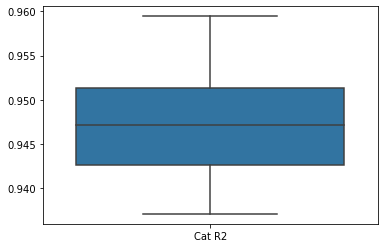

In [25]:
sns.boxplot(data=cat_df[['Cat R2']]);

In [26]:
X_trainCB, X_testCB, Y_trainCB, Y_testCB = train_test_split(X_cat,y_cat,test_size=0.25)
    
CB.fit(X_trainCB, Y_trainCB, verbose=False)
y_pred = CB.predict(X_testCB)

CB_Score = r2_score(Y_testCB, y_pred)
CB_Score

0.9539195034360075

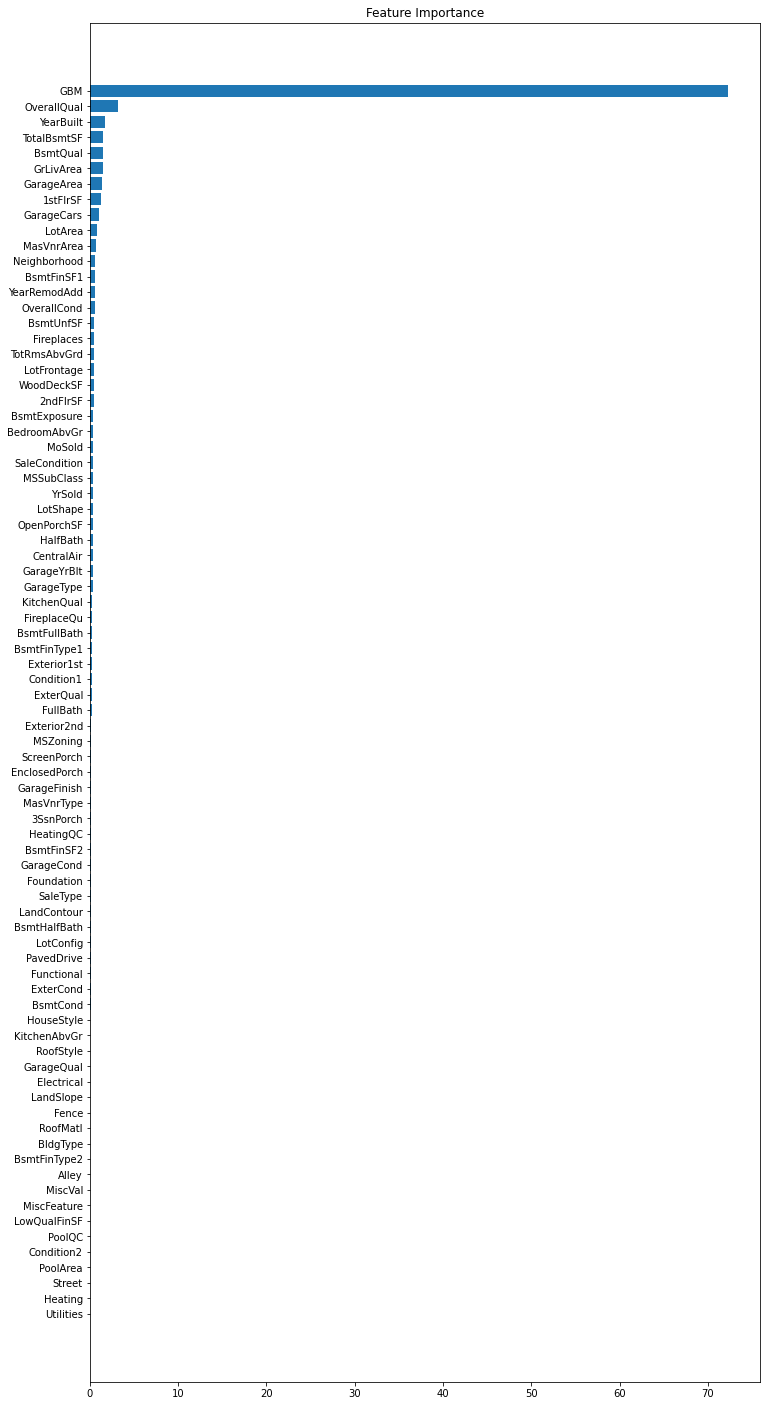

In [27]:
feature_importance = CB.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 25))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_testCB.columns)[sorted_idx])
plt.title('Feature Importance');

In [28]:
X_cols = combo.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, CB.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('GBM', 72.2480527632996),
 ('OverallQual', 3.1905759687355433),
 ('YearBuilt', 1.674829012569676),
 ('TotalBsmtSF', 1.4932274409652277),
 ('BsmtQual', 1.4916076021383242),
 ('GrLivArea', 1.4584147053539216),
 ('GarageArea', 1.4001565979755253),
 ('1stFlrSF', 1.3047413520433702),
 ('GarageCars', 1.0357168166467345),
 ('LotArea', 0.797851868524976),
 ('MasVnrArea', 0.6741235199933826),
 ('Neighborhood', 0.6047619303048305),
 ('BsmtFinSF1', 0.560875524916926),
 ('YearRemodAdd', 0.5255736704923343),
 ('OverallCond', 0.5176650089070906),
 ('BsmtUnfSF', 0.5024638898688213),
 ('Fireplaces', 0.4718865497883338),
 ('TotRmsAbvGrd', 0.4638989599343127),
 ('LotFrontage', 0.4509097078956351),
 ('WoodDeckSF', 0.422304793795427),
 ('2ndFlrSF', 0.4221884841334786),
 ('BsmtExposure', 0.38610583702770535),
 ('BedroomAbvGr', 0.36413418678408205),
 ('MoSold', 0.3444125967493663),
 ('SaleCondition', 0.3423992545241019),
 ('MSSubClass', 0.34006113589237913),
 ('YrSold', 0.31652501702955654),
 ('LotShape',